In [1]:
# importing the required library for dataframe manupulation
import numpy as np
import pandas as pd
# library for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# library for regression model 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# library for hyperparameters tunning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# stats model
import statsmodels.api as sm

In [2]:
# setting pandas rows & columns
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [3]:
### 1. Data understanding and cleaning 

In [4]:
#housing=pd.read_csv("train.csv")
housing=pd.read_csv(r"C:\Users\balod\Desktop\IIIT-B\Assignment\assignment 3\train.csv")

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.shape

(1460, 81)

In [7]:
housing.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
# there is no summary, total, subtotal row present

In [9]:
# lets check if there is any duplicates rows present

In [10]:
sum(housing.duplicated(subset = 'Id')) == 0

True

In [11]:
# no duplicate rows present. 
housing['Id'].nunique()

1460

In [12]:
# Since id is unique in nature, drop it.
housing.drop(['Id'], axis=1, inplace=True)

In [13]:
# checking unique columns
unique_columns = [col for col in housing.columns if housing[col].nunique() == len(housing)]

In [14]:
unique_columns

[]

In [15]:
# there is no unique column

In [16]:
housing.nunique().sort_values()

Street              2
Alley               2
Utilities           2
CentralAir          2
HalfBath            3
PavedDrive          3
MasVnrType          3
BsmtHalfBath        3
LandSlope           3
PoolQC              3
GarageFinish        3
ExterQual           4
KitchenQual         4
BsmtExposure        4
Fence               4
MiscFeature         4
BsmtQual            4
Fireplaces          4
BsmtFullBath        4
LandContour         4
LotShape            4
FullBath            4
KitchenAbvGr        4
BsmtCond            4
GarageCars          5
FireplaceQu         5
GarageQual          5
GarageCond          5
Electrical          5
HeatingQC           5
ExterCond           5
MSZoning            5
YrSold              5
LotConfig           5
BldgType            5
RoofStyle           6
Heating             6
SaleCondition       6
Foundation          6
GarageType          6
BsmtFinType2        6
BsmtFinType1        6
Functional          7
PoolArea            8
BedroomAbvGr        8
HouseStyle

In [17]:
# check the percentage of null values for each columns 

In [18]:
round(housing.isnull().sum()/len(housing),2).sort_values(ascending=False)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
MasVnrType       0.60
FireplaceQu      0.47
LotFrontage      0.18
GarageCond       0.06
GarageQual       0.06
GarageType       0.06
GarageFinish     0.06
GarageYrBlt      0.06
BsmtExposure     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtFinType2     0.03
BsmtFinType1     0.03
MasVnrArea       0.01
MSSubClass       0.00
Fireplaces       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
Functional       0.00
GarageCars       0.00
GrLivArea        0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
BsmtFullBath     0.00
CentralAir       0.00
LowQualFin

In [19]:
# add derived columns yrsOld using YrsSold and YearBuilt 
housing['yrsOld']=housing['YrSold']-housing['YearBuilt']

In [20]:
# we have yrsOld feature derived from YrSold and YearBuilt, hence YrSold and YearBuilt can be dropped.

In [21]:
# poolQC has all the rows as null, drop it.
housing.drop(['PoolQC','YrSold','YearBuilt'], axis=1, inplace=True)

In [22]:
round(housing.isnull().sum()/len(housing),2).sort_values(ascending=False)

MiscFeature      0.96
Alley            0.94
Fence            0.81
MasVnrType       0.60
FireplaceQu      0.47
LotFrontage      0.18
GarageType       0.06
GarageQual       0.06
GarageYrBlt      0.06
GarageCond       0.06
GarageFinish     0.06
BsmtFinType2     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtExposure     0.03
BsmtFinType1     0.03
MasVnrArea       0.01
MSSubClass       0.00
Fireplaces       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
Functional       0.00
GarageCars       0.00
GrLivArea        0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
SaleType         0.00
SaleCondition    0.00
SalePrice        0.00
BsmtFullBath     0.00
CentralAir       0.00
LowQualFinSF     0.00
Neighborho

In [23]:
# get the description of the dataset
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,yrsOld
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,36.547945
std,42.300571,24.284752,9981.264932,1.382997,1.112799,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,8.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,35.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,54.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000,84.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,326100.000000,91.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2

In [24]:
# from above analysis we can see that there are outliers. 
# for further handling the missing value, we will divide the catogorical and numerical values. 
housing_num = housing.select_dtypes(exclude='object')
housing_cat = housing.select_dtypes(include='object')

In [25]:
round(housing_cat.isnull().sum()/len(housing_cat),2).sort_values(ascending=False)

MiscFeature      0.96
Alley            0.94
Fence            0.81
MasVnrType       0.60
FireplaceQu      0.47
GarageCond       0.06
GarageQual       0.06
GarageFinish     0.06
GarageType       0.06
BsmtFinType1     0.03
BsmtFinType2     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtExposure     0.03
Functional       0.00
KitchenQual      0.00
Electrical       0.00
CentralAir       0.00
HeatingQC        0.00
Heating          0.00
PavedDrive       0.00
SaleType         0.00
MSZoning         0.00
Street           0.00
Condition2       0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
BldgType         0.00
Foundation       0.00
HouseStyle       0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
ExterCond        0.00
SaleCondition    0.00
dtype: float64

In [26]:
# as per data dictionary NA represets facility not available for specific features for that particular row. impute values for NA with None
# impute the catogiricsl values

mising_cat_cols=['FireplaceQu','GarageCond', 'GarageQual', 'GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtFinType1',
                 'BsmtQual', 'BsmtFinType2','MasVnrType']
for col in mising_cat_cols:
    housing[col].fillna("None", inplace=True)

In [27]:
mising_cat_cols=['FireplaceQu','GarageCond', 'GarageQual', 'GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtFinType1',
                 'BsmtQual', 'BsmtFinType2','MasVnrType']

In [28]:
round(housing_num.isnull().sum()/len(housing_num),2).sort_values(ascending=False)

LotFrontage      0.18
GarageYrBlt      0.06
MasVnrArea       0.01
OpenPorchSF      0.00
KitchenAbvGr     0.00
TotRmsAbvGrd     0.00
Fireplaces       0.00
GarageCars       0.00
GarageArea       0.00
WoodDeckSF       0.00
MSSubClass       0.00
BedroomAbvGr     0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
SalePrice        0.00
EnclosedPorch    0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
TotalBsmtSF      0.00
BsmtUnfSF        0.00
BsmtFinSF2       0.00
BsmtFinSF1       0.00
YearRemodAdd     0.00
OverallCond      0.00
OverallQual      0.00
LotArea          0.00
yrsOld           0.00
dtype: float64

In [29]:
# Impute the missing values with median for numerical values.
# Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , fill in missing values by the median LotFrontage of the neighborhood.
housing['LotFrontage'] = housing.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# filling 0 GarageYrBlt, GarageAre as features available
for col in ('GarageYrBlt', 'GarageArea'):
    housing[col] = housing[col].fillna(0)

In [30]:
# Checking the percentage of null values of each columns
round(housing.isnull().sum()/len(housing_num),2).sort_values(ascending=False)

MiscFeature      0.96
Alley            0.94
Fence            0.81
MasVnrArea       0.01
MSSubClass       0.00
BedroomAbvGr     0.00
FireplaceQu      0.00
Fireplaces       0.00
Functional       0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
FullBath         0.00
HalfBath         0.00
GarageYrBlt      0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
GarageType       0.00
GarageCars       0.00
GarageFinish     0.00
Electrical       0.00
SalePrice        0.00
SaleCondition    0.00
SaleType         0.00
MoSold           0.00
MiscVal          0.00
PoolArea         0.00
ScreenPorch      0.00
3SsnPorch        0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
1stFlrSF         0.00
CentralAir       0.00
MSZoning         0.00
RoofStyle        0.00
OverallCond      0.00
OverallQual      0.00
HouseStyle

<Axes: >

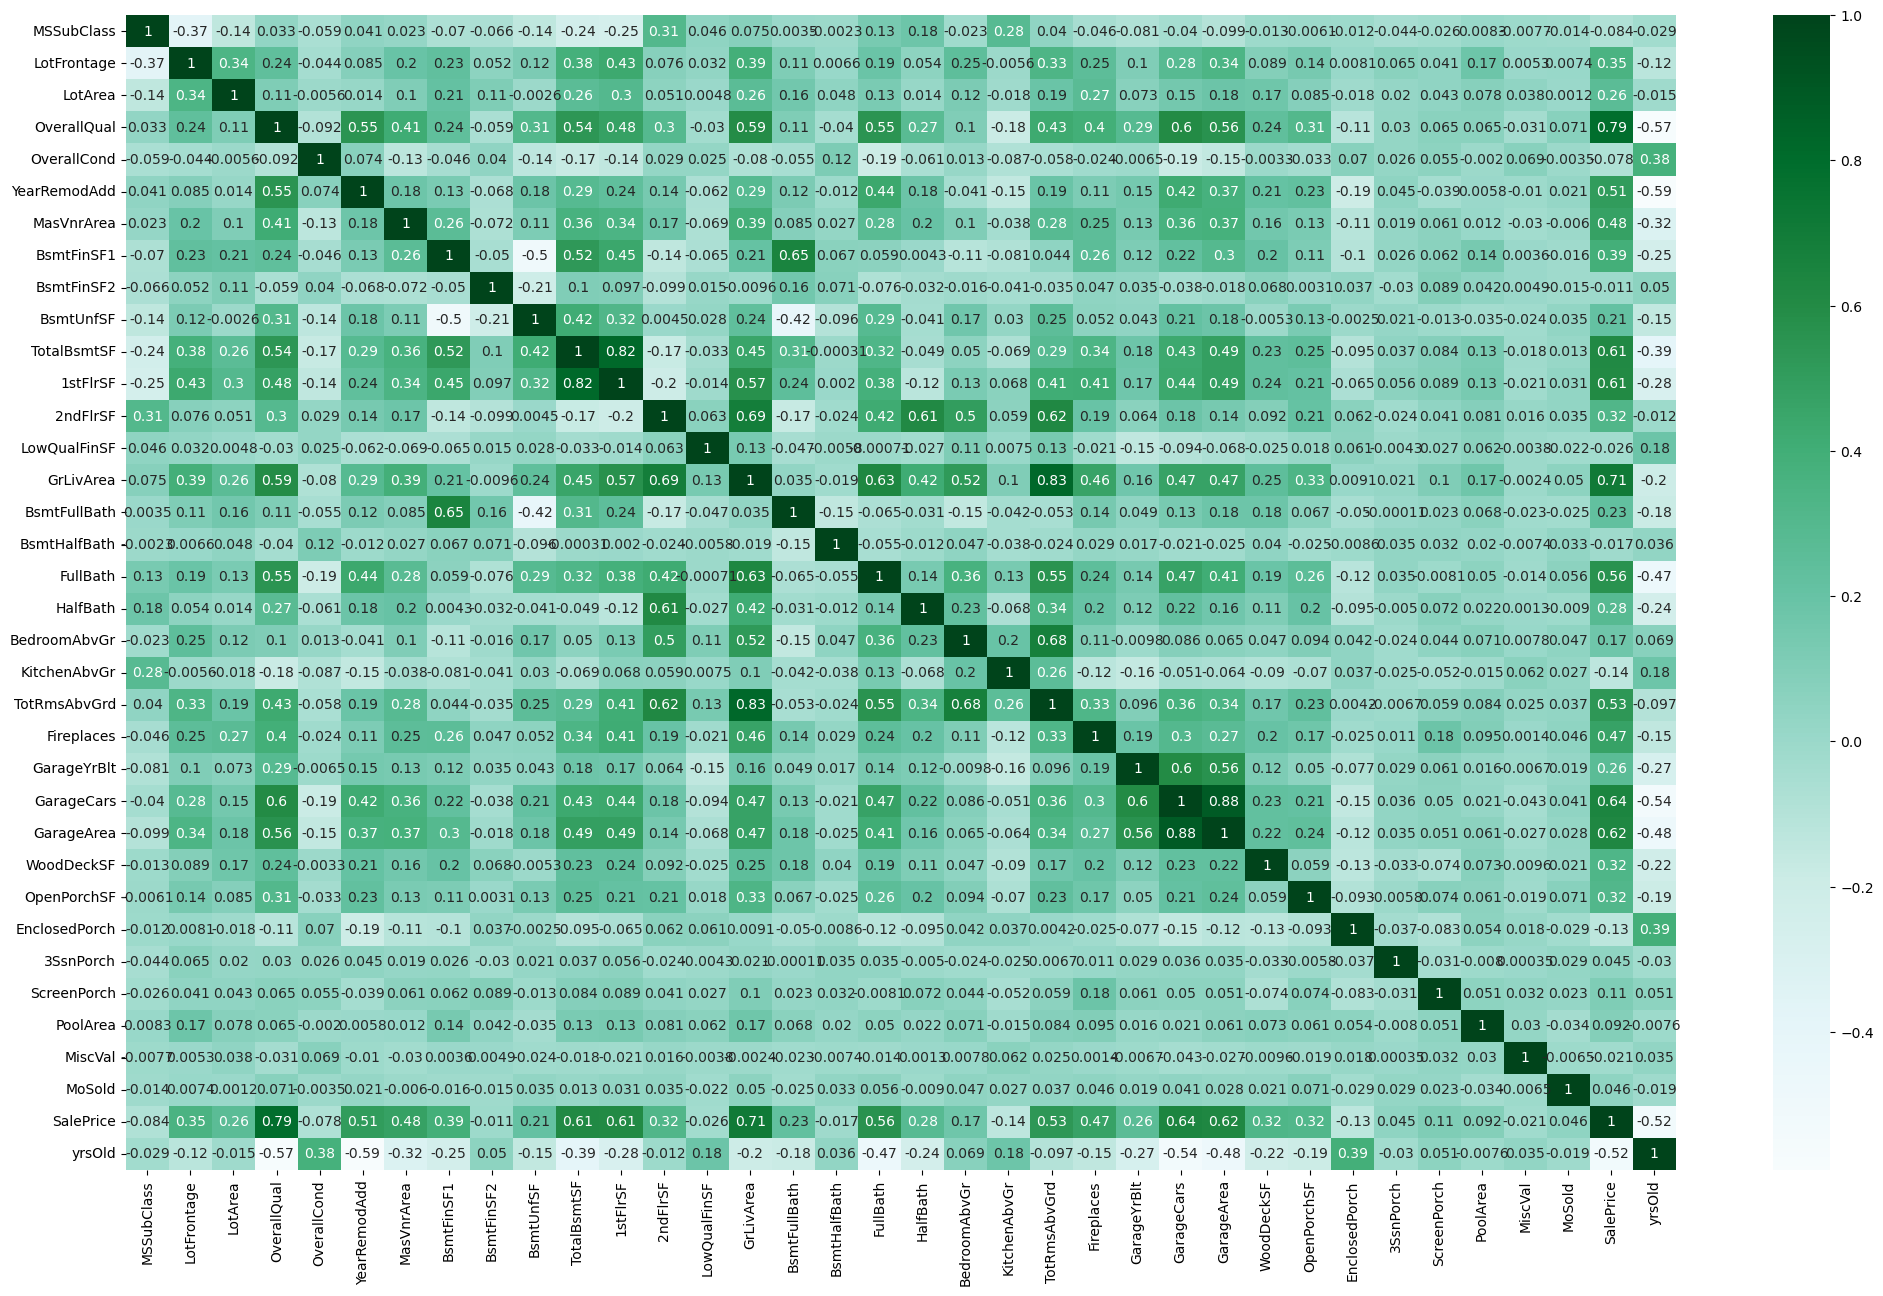

In [31]:
# draw the correlation matrix to understand the dependencies on independent and dependent variables.
corrmat = housing.select_dtypes(include='number').corr()
plt.figure(figsize=(25,15))
sns.color_palette("Greens")
sns.heatmap(corrmat, cmap='BuGn', annot = True)

In [32]:
# From above analysis we can say that GarageArea and GarageCars , GarageYrBlt,GarageYrBuilt, are higly correlated two  of them can be dropped.
# yearBuilt and YearRemodAdd are highly correlated. One of the them can de dropped.
# TotalBaseMentSF and 1stFlrSFT are highly correlated. One of them can be dropped.
# GrLivingArea and TotRmsAbvGrd are higly correlated. One of them can be dropped.

# Also from above we can say that MiscFeature, Alley, Fence are having more than 80 % row NA. Drop them as they don't add more varience.
dropped_columns=['GarageArea','GarageYrBlt','YearRemodAdd','1stFlrSF','MiscFeature','Alley','Fence','TotRmsAbvGrd']

corrmat = housing.select_dtypes(include='number').corr()
housing.drop(dropped_columns, axis=1, inplace=True)

In [33]:
round(housing.isnull().sum()/len(housing_num),2).sort_values(ascending=False)

MasVnrArea       0.01
MSSubClass       0.00
HalfBath         0.00
Fireplaces       0.00
Functional       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
FullBath         0.00
GarageType       0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
Electrical       0.00
FireplaceQu      0.00
GarageFinish     0.00
HeatingQC        0.00
ScreenPorch      0.00
SalePrice        0.00
SaleCondition    0.00
SaleType         0.00
MoSold           0.00
MiscVal          0.00
PoolArea         0.00
3SsnPorch        0.00
GarageCars       0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageCond       0.00
GarageQual       0.00
CentralAir       0.00
Heating          0.00
MSZoning         0.00
LandSlope        0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LotConfig        0.00
TotalBsmtS

In [34]:
# dropping null values rows  for MasVnrArea as total % of dropped rows is 1%
housing = housing[~housing['MasVnrArea'].isnull()]

In [35]:
housing.shape

(1452, 70)

In [36]:
round(housing.isnull().sum()/len(housing_num),2).sort_values(ascending=False)

MSSubClass       0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
GarageType       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
Electrical       0.0
CentralAir       0.0
FireplaceQu      0.0
GarageFinish     0.0
MSZoning         0.0
ScreenPorch      0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
3SsnPorch        0.0
GarageCars       0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
LandSlope        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LotConfig        0.0
BsmtUnfSF        0.0
Utilities        0.0
LandContour  

In [37]:
# From above analysis we can see that there is no misssing values.

In [38]:
###  2. Handling Outliers - Univariate, Bivariate and Multivariate Analyis

<Axes: >

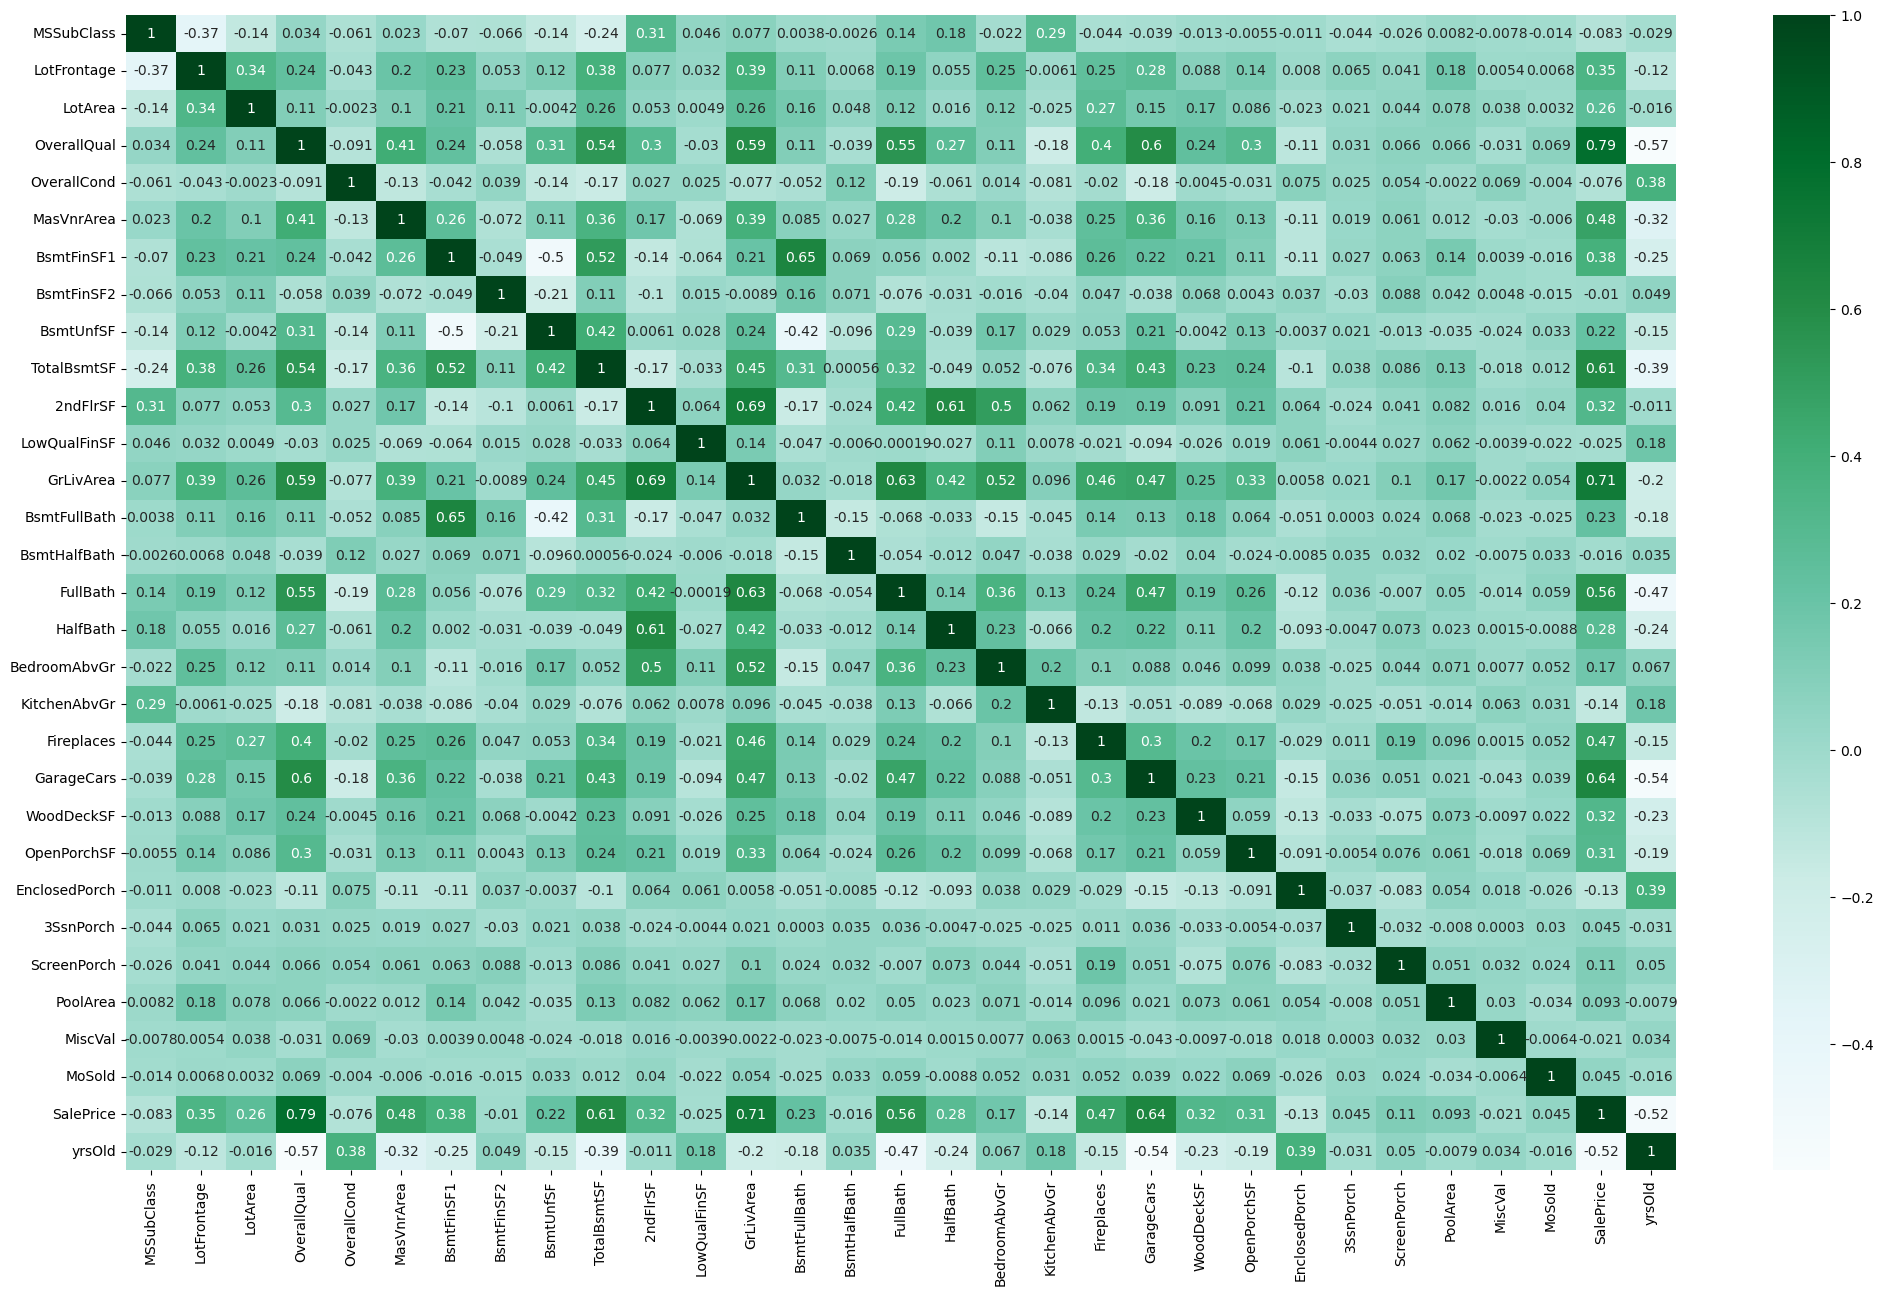

In [39]:
# draw the correlation matrix to understand the dependencies on independent and dependent variables

corrmat = housing.select_dtypes(include='number').corr()
plt.figure(figsize=(25,15))
sns.color_palette("Greens")
sns.heatmap(corrmat, cmap='BuGn', annot = True)

In [40]:
# From above analysis we can infer that LotFrontage, OverAllQuality, YearBult, MassVnrArea, TotalBsmtSF, GrLivingArea, 
# FullBath, TotalRmsAboveGrd, Freplaces, FirePlaces, GarageCars, WoodDeckSF, OpenPorcheSF are higly correalted with SalePrice

In [41]:
# From above analysis we can see that there are outliers. 
# For further handling the missing values, divide the catogorical and numerical values. 
housing_num = housing.select_dtypes(exclude='object')
housing_cat = housing.select_dtypes(include='object')

In [42]:
housing_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,yrsOld
0,60,65.0,8450,7,5,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,2,208500,5
1,20,80.0,9600,6,8,0.0,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,2,298,0,0,0,0,0,0,5,181500,31
2,60,68.0,11250,7,5,162.0,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,2,0,42,0,0,0,0,0,9,223500,7
3,70,60.0,9550,7,5,0.0,216,0,540,756,756,0,1717,1,0,1,0,3,1,1,3,0,35,272,0,0,0,0,2,140000,91
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,1,3,192,84,0,0,0,0,0,12,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,694,0,1647,0,0,2,1,3,1,1,2,0,40,0,0,0,0,0,8,175000,8
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,0,0,2073,1,0,2,0,3,1,2,2,349,0,0,0,0,0,0,2,210000,32
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,1152,0,2340,0,0,2,0,4,1,2,1,0,60,0,0,0,0,2500,5,266500,69
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,0,0,1078,1,0,1,0,2,1,0,1,366,0,112,0,0,0,0,4,142125,60


In [43]:
housing_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal


In [44]:
# numerical columns
housing_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'yrsOld'],
      dtype='object')

In [45]:
# catogorical columns
housing_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [46]:
#### Handling outliers for numerical values

In [47]:
# outliers detection
outliers_percentage={}

for col in housing_num.columns:
    IQR=housing_num[col].quantile(.75)-housing_num[col].quantile(.25)
    outliers_count=housing_num[(housing_num[col]>(housing_num[col].quantile(.75)+1.5*IQR)) | (housing_num[col]<(housing_num[col].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[col]=round(outliers_count/housing_num.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
23,EnclosedPorch,14.26
7,BsmtFinSF2,11.50
4,OverallCond,8.54
25,ScreenPorch,7.99
0,MSSubClass,7.09
5,MasVnrArea,6.61
1,LotFrontage,6.40
14,BsmtHalfBath,5.65
22,OpenPorchSF,5.17
2,LotArea,4.61


In [48]:
# Majority of the numeric columns have outliers
# We will not drop outilers as it can  cause loss of information
# Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
# IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature
# Target column 'SalePrice' is excluded in this

In [49]:
for col,percentage in outliers_percentage.items():
    if col!='SalePrice':
        IQR = housing[col].quantile(.75) - housing[col].quantile(.25) 
        max_value = housing[col].quantile(.75)+1.5*IQR
        min_value = housing[col].quantile(.25)-1.5*IQR
        housing[col][housing[col] > max_value] = max_value
        housing[col][housing[col] < min_value ] = min_value

In [50]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,yrsOld
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.0,1452.000000,1452.000000,1452.000000,1452.0,1452.000000,1452.000000,1452.0,1452.000000,1452.000000,1452.000000,1452.0,1452.000000,1452.000000,1452.000000,1452.000000,1452.0,1452.0,1452.0,1452.0,1452.0,1452.000000,1452.000000,1452.000000
mean,55.127410,69.472796,9644.180871,6.094353,5.546832,90.192149,438.238292,0.0,563.603994,1048.608127,346.739669,0.0,1502.307163,0.423209,0.0,1.562672,0.381543,2.852273,1.0,0.610537,1.763430,91.965565,42.380165,0.0,0.0,0.0,0.0,0.0,6.318182,180615.063361,36.668733
std,37.526939,18.009114,3594.590188,1.376697,0.964145,134.925253,432.082804,0.0,431.911691,397.092564,435.629552,0.0,481.268530,0.517234,0.0,0.550231,0.502664,0.758168,0.0,0.637669,0.743911,116.670967,52.333818,0.0,0.0,0.0,0.0,0.0,2.699644,79285.541485,30.150733
min,20.000000,30.000000,1446.875000,2.000000,3.500000,0.000000,0.000000,0.0,0.000000,41.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,34900.000000,0.000000
25%,20.000000,60.000000,7538.750000,5.000000,5.000000,0.000000,0.000000,0.0,222.500000,794.750000,0.000000,0.0,1128.000000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,129900.000000,8.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,0.000000,381.000000,0.0,477.500000,990.500000,0.000000,0.0,1461.500000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,1.000000,2.000000,0.000000,24.000000,0.0,0.0,0.0,0.0,0.0,6.000000,162700.000000,35.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,166.000000,706.500000,0.0,808.000000,1297.250000,728.000000,0.0,1776.000000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,1.000000,2.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,214000.000000,54.250000
max,145.000000,110.000000,17691.875000,10.000000,7.500000,415.000000,1766.250000,0.0,1686.250000,2051.000000,1820.000000,0.0,2748.000000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,2.500000,3.500000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,755000.000000,123.625000


In [51]:
# oputliers detections
outliers_percentage={}

for feature in housing_num.columns:
    IQR=housing[feature].quantile(.75)-housing[feature].quantile(.25)
    outliers_count=housing[(housing[feature]>(housing[feature].quantile(.75)+1.5*IQR)) | (housing[feature]<(housing[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/housing.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
29,SalePrice,4.13
0,MSSubClass,0.00
16,HalfBath,0.00
28,MoSold,0.00
27,MiscVal,0.00
26,PoolArea,0.00
25,ScreenPorch,0.00
24,3SsnPorch,0.00
23,EnclosedPorch,0.00
22,OpenPorchSF,0.00


In [52]:
# From above analysis we can see that no outliers present

In [53]:
# Let's analyse the categorical values
housing_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [54]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for col in housing_cat.columns:
    if housing[col].isnull().any():
        print(col, ':', round(housing[col].isnull().sum()/housing.shape[0], 2)*100)

Feature : Percentage of Missing Value
Electrical : 0.0


In [55]:
# check the distribution of SalesPrice

<Axes: xlabel='SalePrice', ylabel='Density'>

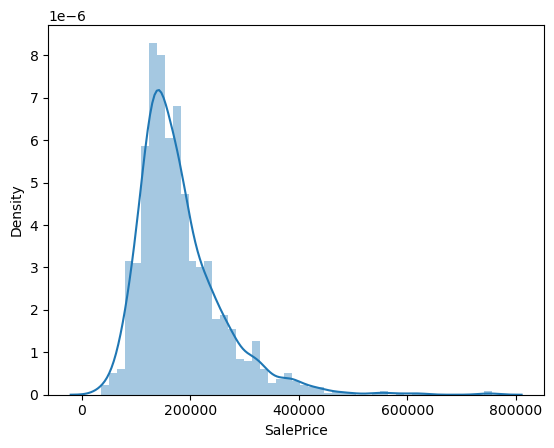

In [56]:
sns.distplot(housing['SalePrice'])

In [57]:
# Sicne distrubution is righ skewed, take the log transformation of salesprice to normalize the distributions

In [58]:
#Log Transformation
housing['SalePrice']=np.log1p(housing['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

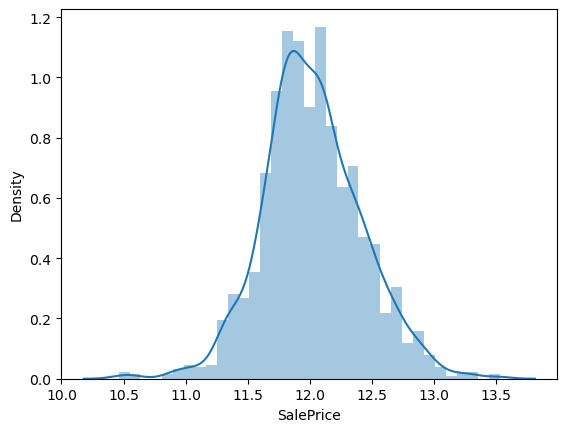

In [59]:
sns.distplot(housing['SalePrice'])

In [60]:
# We can see that SalesPrice is noramlly distributed.

In [61]:
## Analyzing some of top Numerical Features with continuous values

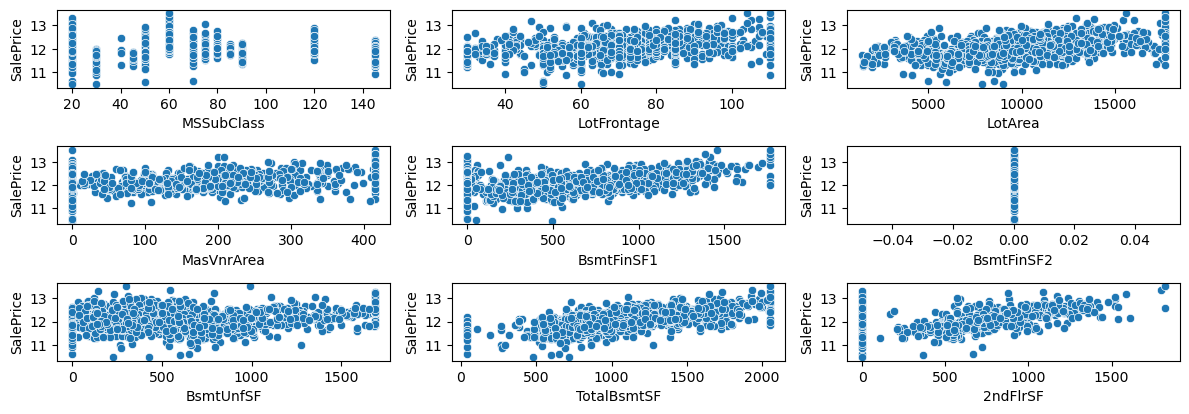

In [62]:
fig=plt.subplots(figsize=(12, 12))

for i, col in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing[col], y=housing['SalePrice'])
    plt.tight_layout()

In [63]:
# inferences:

# Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '2ndFlrSF' are showing positive correlation with SalePrice.
# 'MSSubClass' has discrete values
# 'BsmtSF2' has single value and can be dropped.

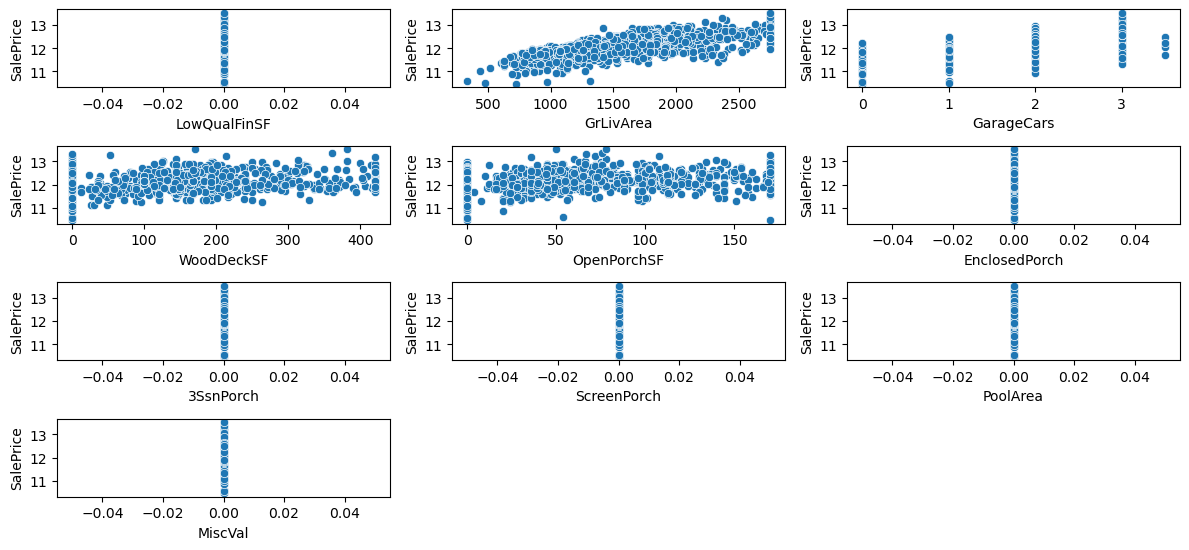

In [64]:
fig=plt.subplots(figsize=(12, 12))

for i, col in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing[col], y=housing['SalePrice'])
    plt.tight_layout()

In [65]:
# inferences:
# From above analysis we can see that LowQualFinSF, EnclosedPorch,3SsnPorch, ScreenPorch , poolArea and MiscVal having single value
# can be dropped as they don't add much varience to the data.
# GrLivArea woodDeckSF and openPorchSF are corrleaetd with SalePrice

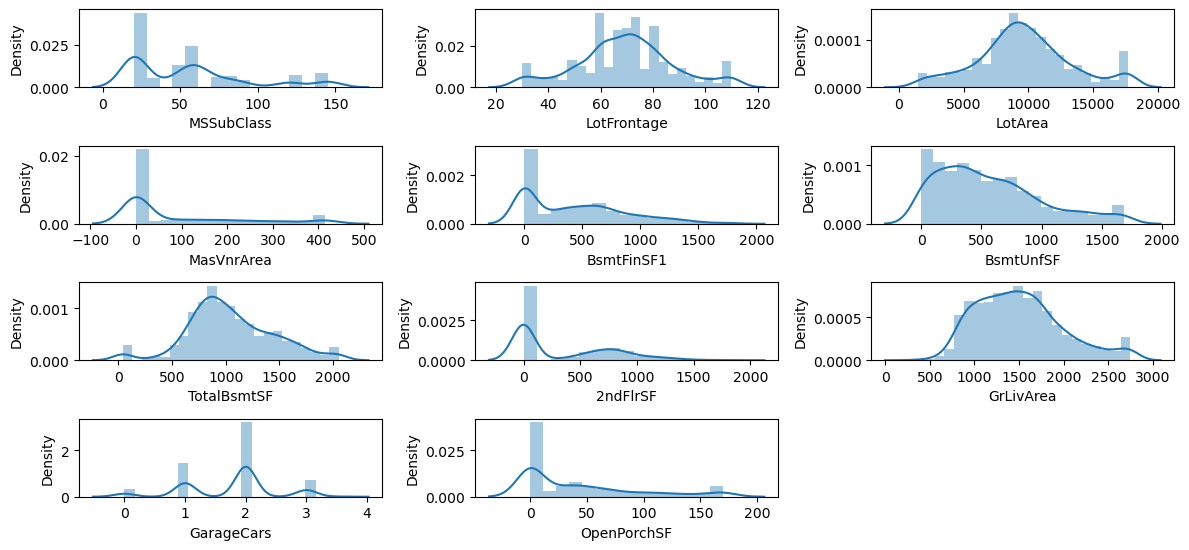

In [66]:
# Analysing the distribution of numerical features

fig=plt.subplots(figsize=(12, 12))

for i, col in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing[col])
    plt.tight_layout()

In [67]:
# inferences:
# MassVnr, BsmtFinSF1, BsmtUnfSF, 2ndFlorSF totalBsmtSf are right skewed

In [68]:
#### Analysing Categorical values

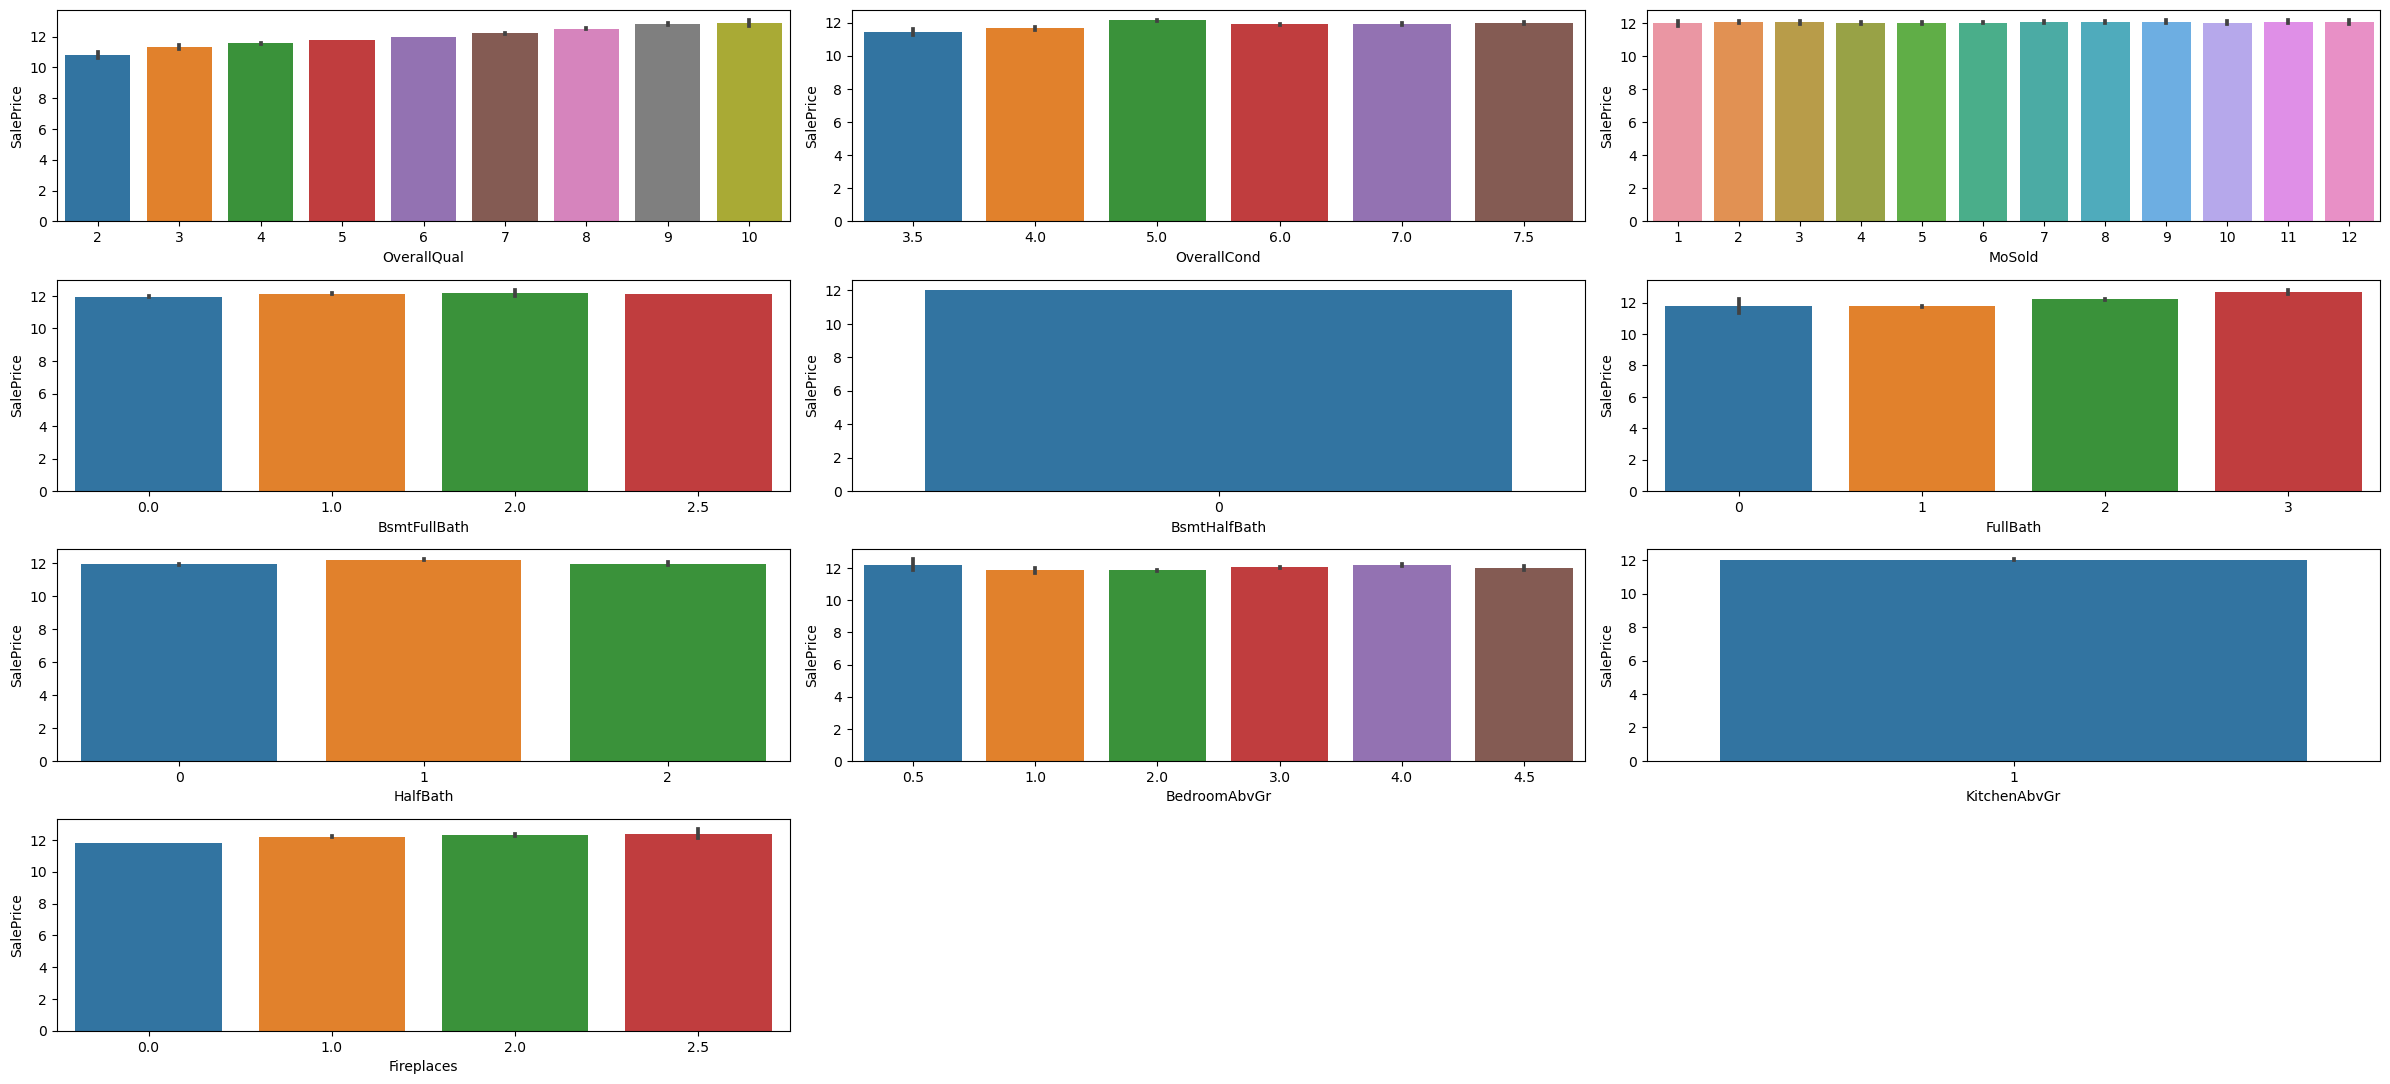

In [69]:
# draw the bar plots for some of the top categorical features

fig=plt.subplots(figsize=(24, 24))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing[feature], y=housing['SalePrice'])
    plt.tight_layout()

In [70]:
# inferences:
# 1. Flat with overall quality 10 is having highest sales price.
# 2. A flat with overallCond 5.0 is having hightest sales price.
# KitcehnAbvGr is having single values can be dropped.

In [71]:
### 3. Data Preparation

In [72]:
housing = pd.get_dummies(housing, drop_first=True )
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,yrsOld,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5.0,196.0,706.0,0,150.0,856,854,0,1710,1.0,0,2,1,3.0,1,0.0,2.0,0,61,0,0,0,0,0,2,12.247699,5.0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600.0,6,7.5,0.0,978.0,0,284.0,1262,0,0,1262,0.0,0,2,0,3.0,1,1.0,2.0,298,0,0,0,0,0,0,5,12.109016,31.0,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250.0,7,5.0,162.0,486.0,0,434.0,920,866,0,1786,1.0,0,2,1,3.0,1,1.0

In [73]:
dropped_colums=['BsmtFinSF2', 'LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
housing.drop(dropped_colums,axis=1, inplace=True)

In [74]:
X = housing.drop(['SalePrice'], axis=1)
y=housing['SalePrice']

In [75]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,yrsOld,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,...,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7,5.0,196.0,706.0,150.0,856,854,1710,1.0,0,2,1,3.0,1,0.0,2.0,0,61,2,5.0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600.0,6,7.5,0.0,978.0,284.0,1262,0,1262,0.0,0,2,0,3.0,1,1.0,2.0,298,0,5,31.0,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,T

In [76]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1452, dtype: float64

In [77]:
# splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1089, 233)
(363, 233)
(1089,)
(363,)


In [79]:
### 4. Feature Scaling

In [80]:
# feature Scaling 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [81]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [82]:
# Checking the features after spliting train and test data

X_tr_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,yrsOld,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,...,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1089.000000,1.089000e+03,1.089000e+03,1089.0,1.089000e+03,1.089000e+03,1.089000e+03,1089.0,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1089.000000,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1089.000000,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1089.000000,1.089000e+03,...,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1089.000000,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+03,1.089000e+

In [83]:
# Given the number of features = n, the function prints and returns top n features selected by RFE
from sklearn.feature_selection import RFE

def top_n_features(n):
    top_n_cols = []
    
    lm = LinearRegression()
    lm.fit(X_tr_scaled, y_train)
    rfe = RFE(estimator=lm, n_features_to_select=n)   # running RFE

    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    print("-------------------")

    return top_n_cols

In [84]:
# Checking top 45, 50, 55.... features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)
top_60 = top_n_features(60)
top_65 = top_n_features(65)
top_70 = top_n_features(70)

Top 45 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN', 'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po', 'Functional_Min1', 'Functional_Min2', 'Functional_Typ', 'GarageType_None', 'GarageFinish_None', 'GarageQual_Fa', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
-------------------
Top 50 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZ

In [85]:
### 5. Model building

In [86]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 and so features.

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())   

In [87]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     281.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:50:09   Log-Likelihood:                 859.98
No. Observations:                1089   AIC:                            -1630.
Df Residuals:                    1044   BIC:                            -1405.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [88]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     262.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:50:09   Log-Likelihood:                 860.18
No. Observations:                1089   AIC:                            -1624.
Df Residuals:                    1041   BIC:                            -1385.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [89]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     257.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:50:09   Log-Likelihood:                 860.27
No. Observations:                1089   AIC:                            -1623.
Df Residuals:                    1040   BIC:                            -1378.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [90]:
build_regressor(X_tr_scaled,y_train,top_60)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     257.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:50:09   Log-Likelihood:                 860.27
No. Observations:                1089   AIC:                            -1623.
Df Residuals:                    1040   BIC:                            -1378.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [91]:
build_regressor(X_tr_scaled,y_train,top_65)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     248.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:50:09   Log-Likelihood:                 874.76
No. Observations:                1089   AIC:                            -1646.
Df Residuals:                    1037   BIC:                            -1386.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [92]:
build_regressor(X_tr_scaled,y_train,top_70)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     232.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:50:09   Log-Likelihood:                 891.31
No. Observations:                1089   AIC:                            -1669.
Df Residuals:                    1032   BIC:                            -1384.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

strong multicollinearity problems or that the design matrix is singular.


In [93]:
top_75 = top_n_features(75)
build_regressor(X_tr_scaled,y_train,top_75)

Top 75 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN', 'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtExposure_None', 'BsmtFinType1_GLQ', 'BsmtFinType1_None', 'CentralAir_Y', 'Electrical_Mix', 'KitchenQual_Fa', 'KitchenQual_Gd', '

In [94]:
build_regressor(X_tr_scaled,y_train,top_n_features(80))

Top 80 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtExposure_None', 'BsmtFinType1_GLQ', 'BsmtF

In [95]:
build_regressor(X_tr_scaled,y_train,top_n_features(85))

Top 85 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtCond_Po'

In [96]:
build_regressor(X_tr_scaled,y_train,top_n_features(100))

Top 100 features : 
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'HouseStyle_2Story', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exter

In [97]:
build_regressor(X_tr_scaled,y_train,top_n_features(105))

Top 105 features : 
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_2Story', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock

In [98]:
build_regressor(X_tr_scaled,y_train,top_n_features(110))

Top 110 features : 
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_Feedr', 'Condition2_PosN', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_2Story', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [99]:
build_regressor(X_tr_scaled,y_train,top_n_features(115))

Top 115 features : 
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_2Story', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exteri

In [100]:
build_regressor(X_tr_scaled,y_train,top_n_features(95))

Top 95 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'HouseStyle_2Story', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', '

In [101]:
build_regressor(X_tr_scaled,y_train,top_n_features(90))

Top 90 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'F

In [102]:
build_regressor(X_tr_scaled,y_train,top_n_features(85))

Top 85 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtCond_Po'

In [103]:
build_regressor(X_tr_scaled,y_train,top_n_features(80))

Top 80 features : 
['LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None', 'BsmtCond_Po', 'BsmtExposure_Gd', 'BsmtExposure_None', 'BsmtFinType1_GLQ', 'BsmtF

In [104]:
### 6. Cross Validation and Final Model Selection

In [105]:
# From above analysis we can see that we are not seeing the changes in adj R square if we increase number of features more than 105.
# hence optimal value for number of features is 105.

# Capture the top 105
top_105=top_n_features(105)
X_train_rfe = X_tr_scaled[top_105]
X_test_rfe = X_te_scaled[top_105]

Top 105 features : 
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'yrsOld', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_2Story', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock

In [106]:
#  Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
    
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

In [107]:
### 7.  Ridge Regression

In [108]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 50.000000
ridge  Regression with  50
R2 score (train) :  0.9302659165108079
R2 score (test) :  0.9063747171226282
RMSE (train) :  0.10405141650713857
RMSE (test) :  0.1268016826600198


In [109]:
# Ridge Regression model is able to achieve 90.63 % of the variance in test data can be explained by the model.

# Root Mean Square Error = 0.126 on test data, that means the prediction made by the model can off by 0.126 unit.

In [110]:
### 8. Lasso Regression

In [111]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9325654807750269
R2 score (test) :  0.9044339715549808
RMSE (train) :  0.1023214252718433
RMSE (test) :  0.12810916902768948


In [112]:
# Lasso Regression model is able to achieve 90.44 % of the variance in test data can be explained by the model.

# Root Mean Square Error = 0.128 on test data, that means the prediction made by the model can off by 0.128 unit.

In [113]:
### 9.Comparing Model Coefficients

In [114]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=50.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=50.0),Lasso (alpha=0.001)
LotFrontage,0.011587,0.008517
LotArea,0.030158,0.029898
OverallQual,0.065581,0.069898
OverallCond,0.050434,0.053697
BsmtUnfSF,-0.012104,-0.016212
TotalBsmtSF,0.064633,0.062783
2ndFlrSF,0.019480,0.006044
GrLivArea,0.095677,0.121353
BsmtFullBath,0.023371,0.021415
BsmtHalfBath,0.000000,0.000000


In [115]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[254576 213470 116329 164065 111342]


In [116]:
### 10. Selecting the Final Model

In [117]:
# Here ridge has perform little better than Lasso. But We don't see much significant difference. Will use Lasso model as final model 
# as it marks insignificance features to zero which we have already analyzed as a part of EDA analysis, and also helps to keep our model simple.

In [118]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
GrLivArea,0.121353
RoofMatl_CompShg,0.087633
OverallQual,0.069898
TotalBsmtSF,0.062783
RoofMatl_Tar&Grv,0.060547
MSZoning_RL,0.059438
OverallCond,0.053697
MSZoning_RM,0.041045
RoofMatl_WdShake,0.040261
RoofMatl_WdShngl,0.035948


In [119]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['GrLivArea', 'RoofMatl_CompShg', 'OverallQual', 'TotalBsmtSF',
       'RoofMatl_Tar&Grv', 'MSZoning_RL', 'OverallCond', 'MSZoning_RM',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl'],
      dtype='object')

In [120]:
# We can see that the top feautues, are similar features that we have identified as a part of EDA Analysis

### Solve subjective Questions of Part-II

In [121]:
# Question 1

In [122]:
ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, {'alpha':[100]}, model='ridge')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for ridge is 100.000000
ridge  Regression with  100
R2 score (train) :  0.9263502703159545
R2 score (test) :  0.9051751993451124
RMSE (train) :  0.10693282165553279
RMSE (test) :  0.1276113827146637


In [123]:
lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, {'alpha':[0.002]}, model='lasso')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for lasso is 0.002000
lasso  Regression with  0.002
R2 score (train) :  0.9245415844379445
R2 score (test) :  0.9077396484666771
RMSE (train) :  0.10823788292754366
RMSE (test) :  0.1258739896860086


In [124]:
model_coefficients['Ridge (alpha=100.0)'] = ridge_final_model.coef_
model_coefficients[['Ridge (alpha=100.0)']].sort_values(by='Ridge (alpha=100.0)', ascending=False).index[:10]

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'GarageCars',
       'RoofMatl_CompShg', 'LotArea', 'MSZoning_RL', 'BsmtFullBath',
       'Neighborhood_NridgHt'],
      dtype='object')

In [125]:
model_coefficients['Lasso (alpha=0.002)'] = lasso_final_model.coef_
model_coefficients[['Lasso (alpha=0.002)']].sort_values(by='Lasso (alpha=0.002)', ascending=False).index[:10]

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'GarageCars',
       'LotArea', 'RoofMatl_CompShg', 'Neighborhood_NridgHt', 'BsmtFullBath',
       'Neighborhood_Crawfor'],
      dtype='object')

In [126]:
# Question 3
model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

,Ridge (alpha=50.0),Lasso (alpha=0.001),Ridge (alpha=100.0),Lasso (alpha=0.002)
GrLivArea,0.095677,0.121353,0.086032,0.125604
RoofMatl_CompShg,0.051249,0.087633,0.030391,0.024705
OverallQual,0.065581,0.069898,0.063965,0.073325
TotalBsmtSF,0.064633,0.062783,0.061807,0.059685
RoofMatl_Tar&Grv,0.035662,0.060547,0.020456,0.015154


In [127]:
# Top 5 featues in Lasso final model

In [128]:
model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

,Ridge (alpha=50.0),Lasso (alpha=0.001),Ridge (alpha=100.0),Lasso (alpha=0.002)
GrLivArea,0.095677,0.121353,0.086032,0.125604
RoofMatl_CompShg,0.051249,0.087633,0.030391,0.024705
OverallQual,0.065581,0.069898,0.063965,0.073325
TotalBsmtSF,0.064633,0.062783,0.061807,0.059685
RoofMatl_Tar&Grv,0.035662,0.060547,0.020456,0.015154


In [129]:
X_train_n = X_train_rfe.drop(['GrLivArea', 'RoofMatl_CompShg', 'OverallQual', 'TotalBsmtSF', 'RoofMatl_Tar&Grv'], axis=1)
X_test_n = X_test_rfe.drop(['GrLivArea', 'RoofMatl_CompShg', 'OverallQual', 'TotalBsmtSF', 'RoofMatl_Tar&Grv'], axis=1)

In [130]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_n, y_train)
y_train_pred = lasso_model.predict(X_train_n)
y_test_pred = lasso_model.predict(X_test_n)

In [131]:
model_coeff = pd.DataFrame(index=X_test_n.columns)
model_coeff.rows = X_test_n.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
2ndFlrSF,0.067528
MSZoning_RL,0.066441
GarageCars,0.057220
MSZoning_RM,0.054915
OverallCond,0.053678
